# Capstone Project-Auto Insurance
Jessica Mao

## Objectives
   In the field of big data, when we label the customer's behavioral data, we have an intuitive understanding of the customer.  At the same time, machine learning models can understand customers and use their behavioral information for personalized recommendations, personalized search, advertising precision placement, and intelligent marketing. Based on the user portrait, a set of analysis platforms can be built for product positioning, competitor analysis, revenue analysis, etc., providing data support and a factual basis for product direction and decision making.

This auto insurance company is struggling to keep its customers, and most of the renewal offers were turned down by the customers. With the dataset provided by the company, I will perform an analysis to identify customer needs and behaviors to focus on how the company's renewal offer can once again attract its customers. Also, based on the dataset and the customer features provided, I will predict customers' responses to new insurance offers.

## Data Understanding

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import sklearn
from sklearn.model_selection import train_test_split
from sklearn import preprocessing 
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC,LinearSVC 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import classification_report,precision_score,recall_score,f1_score
import warnings
warnings.filterwarnings('ignore')


df = pd.read_csv('Marketing_Customer_Value_Analysis.csv')
df.head(3)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   State                          9134 non-null   object 
 1   Customer Lifetime Value        9134 non-null   float64
 2   Response                       9134 non-null   object 
 3   Coverage                       9134 non-null   object 
 4   Education                      9134 non-null   object 
 5   EmploymentStatus               9134 non-null   object 
 6   Gender                         9134 non-null   object 
 7   Income                         9134 non-null   int64  
 8   Location Code                  9134 non-null   object 
 9   Marital Status                 9134 non-null   object 
 10  Monthly Premium Auto           9134 non-null   int64  
 11  Months Since Last Claim        9134 non-null   int64  
 12  Months Since Policy Inception  9134 non-null   i

In [4]:
df.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


This dataset contains categorical and continuous variables that don't need strenuous data cleaning process. The dataset has 9134 customers' policy information, total claim amount, vehicle type, and response to the renewal offer type they received, etc. It also includes general customer information regarding their marital, employment, education, and living status. The target of this dataset is the Response column, yes or no to accepting the renewal offer.

## Data Preparation

In [5]:
df.isnull().sum()

State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

In [2]:
df = df.drop(['Customer', 'Effective To Date'], axis=1)

### General Customer Overview

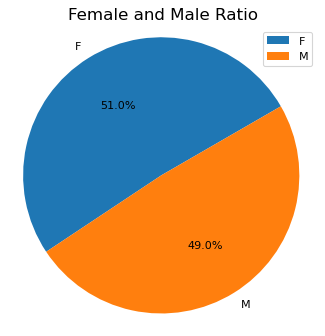

In [81]:
gender = df.groupby('Gender')['Customer'].count()
gender = gender.to_frame()
plt.figure(figsize=(5,5),dpi=80)
plt.pie(gender['Customer'],labels=gender.index,autopct="%1.1f%%",shadow=False,startangle=30,pctdistance=0.6)
plt.axis("equal")
plt.legend(loc="best")
plt.title("Female and Male Ratio",fontsize=15)
plt.show()

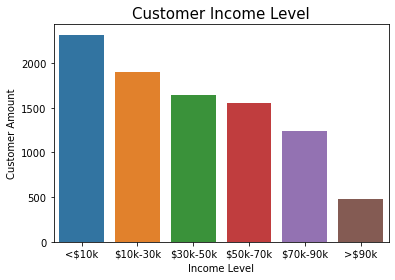

In [6]:
sections = [0,10000,30000,50000,70000,90000,max(df['Income'])+1]
income = pd.cut(df['Income'], sections, right = False)
income = pd.value_counts(income)
income.index=['<$10k','$10k-30k','$30k-50k','$50k-70k','$70k-90k','>$90k']
income.columns=['Customer Amount']
income = income.reset_index()
income
a = sns.barplot(x='index',y='Income',data=income).set_ylabel('Customer Amount')
# plt.xticks(rotation=90)
plt.xlabel('Income Level')
plt.title("Customer Income Level",fontsize=15)
plt.show()

Most of the customer of this insurance company has a below \\$10,000 dolars income level, and the mean of the income level is around \$30,000.

### Customer Lifetime Values

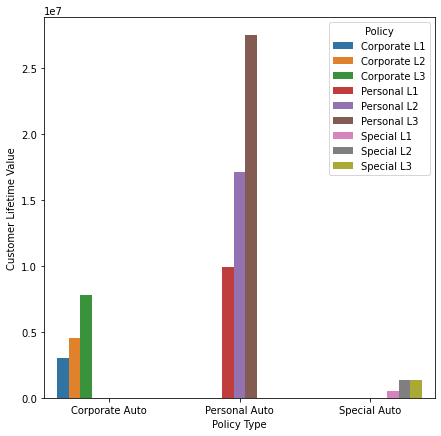

In [82]:
#policy type,policy, and customer value
policy = df.groupby(['Policy Type','Policy'])['Customer Lifetime Value'].sum().reset_index()
plt.figure(figsize=(7, 7))

a = sns.barplot(x = 'Policy Type', y = 'Customer Lifetime Value', 
                hue = 'Policy', data = policy)

plt.show()

Customers like to purchase personal auto insurance from this company

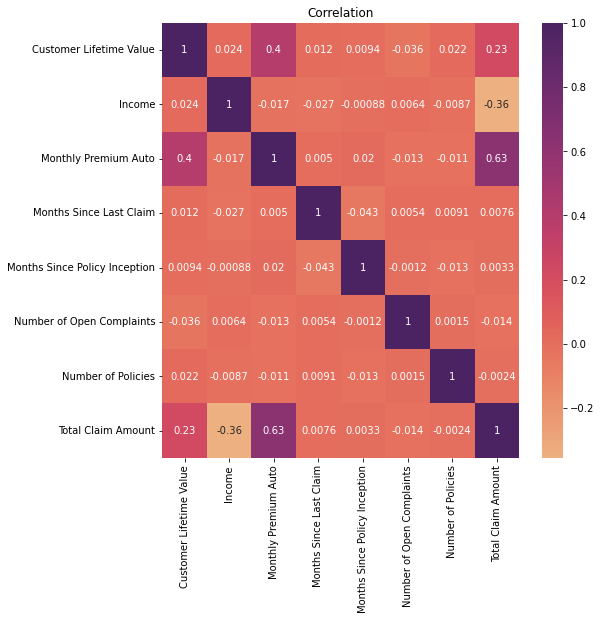

In [7]:
df1 = df[['Customer Lifetime Value','Income','Monthly Premium Auto','Months Since Last Claim',
         'Months Since Policy Inception','Number of Open Complaints','Number of Policies',
         'Total Claim Amount']]
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(), annot=True,cmap = 'flare')
plt.title('Correlation')
plt.show()

The correlation map shows that monthly auto insurance premium, total claim amount, and customer lifetime value seem to have a positive correlation. Below is the relational plot of customer lifetime value, monthly premium auto, and total claim amount. The plot shows a positive upwards trend to the right. Customers around the 20000 CLV and greater can be considered to have high customer lifetime value. Generally, they have higher monthly premiums and low total claim amounts.

<Figure size 2160x2160 with 0 Axes>

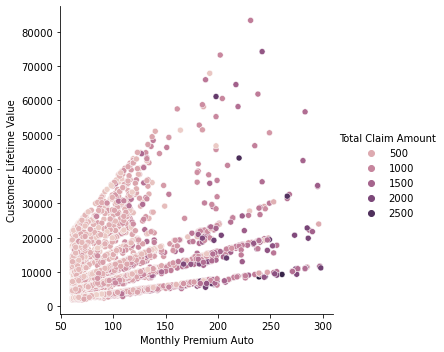

In [8]:
plt.figure(figsize=(30,30))
sns.relplot(x="Monthly Premium Auto", y="Customer Lifetime Value",
            hue='Total Claim Amount', data=df1)
plt.show()

### Customer Response

In [9]:
def percent_show(ax):
    total = len(df)
    for p in r.patches:
        percentage = f'{100 * p.get_height() / total:.1f}%\n'
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        r.annotate(percentage, (x, y), ha='center', va='center')

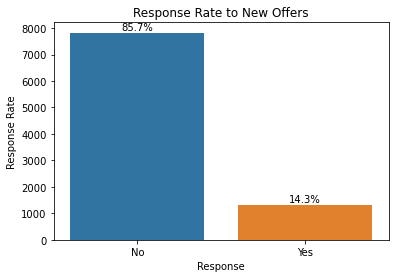

In [80]:
# percent of response to renew offer type
r = sns.countplot(x='Response',data = df)
plt.ylabel('Response Rate')
plt.title('Response Rate to New Offers')
percent_show(r)
plt.show()

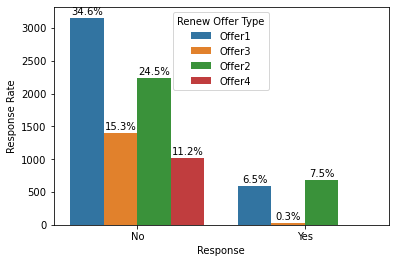

In [11]:
#percent of response to offer type
r = sns.countplot(x='Response',hue ='Renew Offer Type', data = df)
plt.ylabel('Response Rate')
percent_show(r)
plt.show()

We can see that the response percentage is relatively low from the above two plots. 85.7% of the customer rejected the new offers, and only 14.3% accepted the offer. The renew offer types that customers accepted are offer 1 and offer 2.

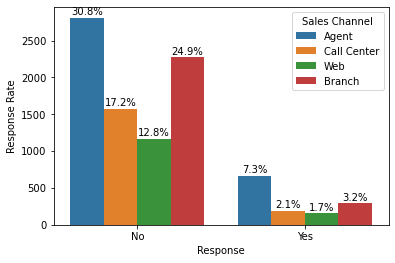

In [12]:
#percent of response to employment status
r = sns.countplot(x='Response',hue ='Sales Channel', data = df)
plt.ylabel('Response Rate')
percent_show(r)
plt.show()

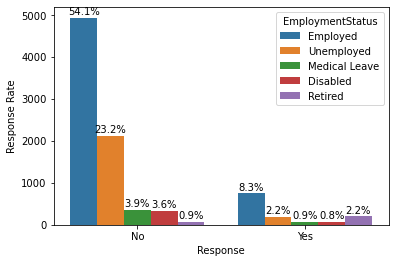

In [13]:
#percent of response to employment status
r = sns.countplot(x='Response',hue ='EmploymentStatus', data = df)
plt.ylabel('Response Rate')
percent_show(r)
plt.show()

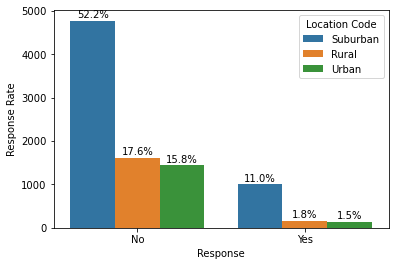

In [14]:
#percent of response to location
r = sns.countplot(x='Response',hue ='Location Code', data = df)
plt.ylabel('Response Rate')
percent_show(r)
plt.show()

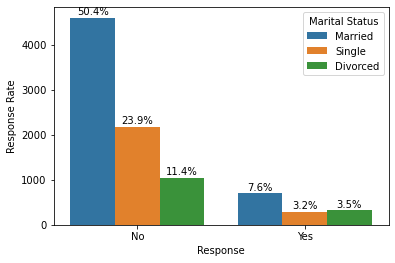

In [15]:
#percent of response to marital status
r = sns.countplot(x='Response',hue ='Marital Status', data = df)
plt.ylabel('Response Rate')
percent_show(r)
plt.show()

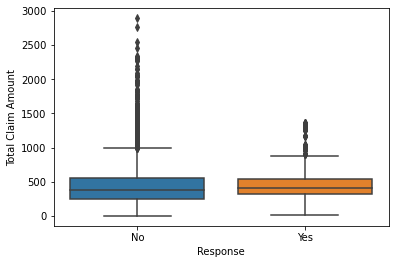

In [16]:
#response to total claim amount
sns.boxplot(x = df.Response,y = df['Total Claim Amount'])
plt.show()

The response plots above show that customers who are likely to accept the offer are married, reside in the suburbs, and are currently employed. Agents have a higher chance to persuade customers to renew their offers. Customers that are divorced or retired also have a slightly higher percentage of accepting the offer. When comparing the response to the total claim amount, the response seems to be spread evenly among Yes and No within the normal range quartile. The customers with the exceptionally high total claim amount choose not to continuously pay for the insurance, which is reasonable because customers with a higher total claim amount will have a higher renewal offer quote.

### Format Data

In [17]:
response= {"No": 0,"Yes": 1 }
df['Response']  = df['Response'].map(response)

In [18]:
#hot code to find customer characteristics and renewal response rate
hotcode = pd.get_dummies(df.iloc[:,1:22])
hotcode.head(10)

,Customer Lifetime Value,Response,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,Coverage_Basic,...,Sales Channel_Web,Vehicle Class_Four-Door Car,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Large,Vehicle Size_Medsize,Vehicle Size_Small
0,2763.519279,0,56274,69,32,5,0,1,384.811147,1,...,0,0,0,0,0,0,1,0,1,0
1,6979.535903,0,0,94,13,42,0,8,1131.464935,0,...,0,1,0,0,0,0,0,0,1,0
2,12887.431650,0,48767,108,18,38,0,2,566.472247,0,...,0,0,0,0,0,0,1,0,1,0
3,7645.861827,0,0,106,18,65,0,7,529.881344,1,...,0,0,0,0,1,0,0,0,1,0
4,2813.692575,0,43836,73,12,44,0,1,138.130879,1,...,0,1,0,0,0,0,0,0,1,0
5,8256.297800,1,62902,69,14,94,0,2,159.383042,1,...,1,0,0,0,0,0,1,0,1,0
6,5380.898636,1,55350,67,0,13,0,9,321.600000,1,...,0,1,0,0,0,0,0,0,1,0
7,7216.100311,0,0,101,0,68,0,4,363.029680,0,...,0,1,0,0,0,0,0,0,1,0
8,24127.504020,1,14072,71,13,3,0,2,511.200000,1,...,0,1,0,0,0,0,0,0,1,0
9,7388.178085,0,28812,93,17,7,0,8,425.527834,0,...,0,1,0,0,0,0,0,0,1,0


Choosing varaibles that have a strong correlatin to customer response.

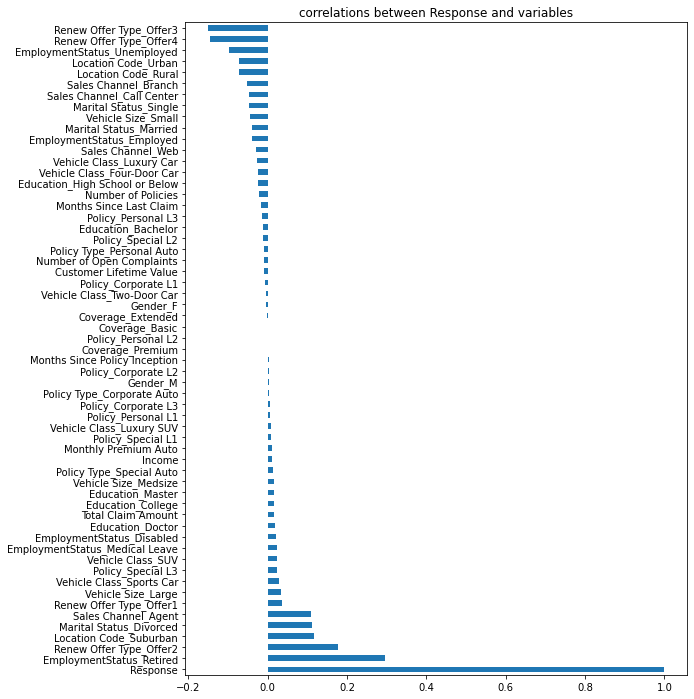

In [19]:
plt.figure(figsize=(9,12))
hotcode.corr()['Response'].sort_values(ascending=False).plot(kind='barh')
plt.title('correlations between Response and variables')
plt.show()

It is visible that Total Claim Amount, education level, the monthly premiums, vehicle types, locations, ways of selling insurance, renewal of the offer, marital status, policy kind, employment status correlate with the customer response to accept the offer.

In [20]:
features = df[['Total Claim Amount','Education','Monthly Premium Auto','Vehicle Size',
                     'Vehicle Class','Location Code','Sales Channel','Renew Offer Type','Marital Status',
                     'Policy','EmploymentStatus','Response']]
scaler = StandardScaler(copy=False)
scaler.fit_transform(features[['Total Claim Amount','Monthly Premium Auto']])

array([[-0.16963969, -0.70392465],
       [ 2.400737  ,  0.02269103],
       [ 0.45573376,  0.42959581],
       ...,
       [ 1.22793667, -0.23889062],
       [ 0.88511256,  0.08082028],
       [-0.22200449, -0.47140763]])

In [21]:
features[["Total Claim Amount","Monthly Premium Auto"]]=scaler.fit_transform(features[["Total Claim Amount","Monthly Premium Auto"]])
features

,Total Claim Amount,Education,Monthly Premium Auto,Vehicle Size,Vehicle Class,Location Code,Sales Channel,Renew Offer Type,Marital Status,Policy,EmploymentStatus,Response
0,-0.169640,Bachelor,-0.703925,Medsize,Two-Door Car,Suburban,Agent,Offer1,Married,Corporate L3,Employed,0
1,2.400737,Bachelor,0.022691,Medsize,Four-Door Car,Suburban,Agent,Offer3,Single,Personal L3,Unemployed,0
2,0.455734,Bachelor,0.429596,Medsize,Two-Door Car,Suburban,Agent,Offer1,Married,Personal L3,Employed,0
3,0.329769,Bachelor,0.371467,Medsize,SUV,Suburban,Call Center,Offer1,Married,Corporate L2,Unemployed,0
4,-1.018843,Bachelor,-0.587666,Medsize,Four-Door Car,Rural,Agent,Offer1,Single,Personal L1,Employed,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9129,-0.811934,Bachelor,-0.587666,Medsize,Four-Door Car,Urban,Web,Offer2,Married,Personal L1,Employed,0
9130,-0.188956,College,-0.413278,Medsize,Four-Door Car,Suburban,Branch,Offer1,Divorced,Corporate L3,Employed,1
9131,1.227937,Bachelor,-0.238891,Medsize,Four-Door Car,Suburban,Branch,Offer1,Single,Corporate L2,Unemployed,0
9132,0.885113,College,0.080820,Large,Four-Door Car,Suburban,Branch,Offer3,Married,Personal L2,Employed,0


In [22]:
#remove outliers in total claim amount and monthly premium auto
cols = ['Total Claim Amount','Monthly Premium Auto']
Q1 = features[cols].quantile(0.25)
Q3 = features[cols].quantile(0.75)
IQR = Q3 - Q1
features = features[~((features[cols] < (Q1 - 1.5 * IQR)) |(features[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
print(IQR)

Total Claim Amount      0.947579
Monthly Premium Auto    1.191650
dtype: float64


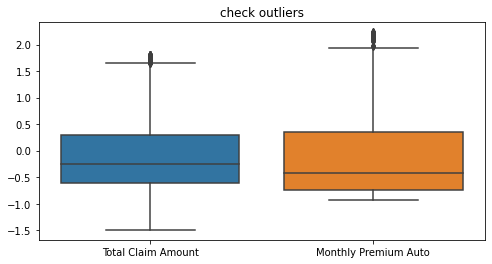

In [23]:
plt.figure(figsize=(8,4))
numbox = sns.boxplot(data = features[["Total Claim Amount","Monthly Premium Auto"]])
plt.title("check outliers")
plt.show()

In [24]:
category = ['Education','Vehicle Size','Vehicle Class',
            'Location Code','Sales Channel','Renew Offer Type',
            'Marital Status','Policy','EmploymentStatus']
for i in category:
    print('{} \n'.format(df[i].value_counts()))

Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: Education, dtype: int64 

Medsize    6424
Small      1764
Large       946
Name: Vehicle Size, dtype: int64 

Four-Door Car    4621
Two-Door Car     1886
SUV              1796
Sports Car        484
Luxury SUV        184
Luxury Car        163
Name: Vehicle Class, dtype: int64 

Suburban    5779
Rural       1773
Urban       1582
Name: Location Code, dtype: int64 

Agent          3477
Branch         2567
Call Center    1765
Web            1325
Name: Sales Channel, dtype: int64 

Offer1    3752
Offer2    2926
Offer3    1432
Offer4    1024
Name: Renew Offer Type, dtype: int64 

Married     5298
Single      2467
Divorced    1369
Name: Marital Status, dtype: int64 

Personal L3     3426
Personal L2     2122
Personal L1     1240
Corporate L3    1014
Corporate L2     595
Corporate L1     359
Special L2       164
Special L3       148
Special L1    

Label encode the categorical variables.

In [25]:
education= {"Bachelor": 0,"College": 1,"High School or Below":2,'Master':3,'Doctor':4}
features['Education']  = features['Education'].map(education)

vehiclesize = {"Small": 0,"Medsize": 1,"Large": 2 }
features['Vehicle Size']  = features['Vehicle Size'].map(vehiclesize)

vehicleclass = {"Four-Door Car": 0,"Two-Door Car": 1,"SUV": 2,"Sports Car": 3,
                "Luxury SUV": 4,"Luxury Car": 5 }
features['Vehicle Class']  = features['Vehicle Class'].map(vehicleclass)

location = {"Rural": 0, "Suburban": 1, "Urban": 2}
features['Location Code'] = features['Location Code'].map(location)

sales= {"Agent": 0,"Branch":1,'Call Center':2,'Web':3}
features['Sales Channel']  = features['Sales Channel'].map(sales)

offer= {"Offer1": 0,"Offer2":1,'Offer3':2,'Offer4':3}
features['Renew Offer Type']  = features['Renew Offer Type'].map(offer)

marital = {"Married": 0,"Single": 1,"Divorced": 2 }
features['Marital Status']  = features['Marital Status'].map(marital)

policy = {"Personal L3": 0,"Personal L2": 1,"Personal L1": 2,"Corporate L3": 3,"Corporate L2": 4,"Corporate L1": 5,"Special L3": 6,"Special L2": 7,"Special L1": 8 }
features['Policy']  = features['Policy'].map(policy)

employ= {"Employed": 0,"Unemployed":1,'Medical Leave':2,'Disabled':3,'Retired':4}
features['EmploymentStatus']  = features['EmploymentStatus'].map(employ)

## Modeling

In [75]:
features.head()

,Total Claim Amount,Education,Monthly Premium Auto,Vehicle Size,Vehicle Class,Location Code,Sales Channel,Renew Offer Type,Marital Status,Policy,EmploymentStatus,Response
0,-0.169640,0,-0.703925,1,1,1,0,0,0,3,0,0
2,0.455734,0,0.429596,1,1,1,0,0,0,0,0,0
3,0.329769,0,0.371467,1,2,1,2,0,0,4,1,0
4,-1.018843,0,-0.587666,1,0,0,0,0,1,2,0,0
5,-0.945682,0,-0.703925,1,1,0,3,1,0,0,0,1


In [51]:
X=features.iloc[:,0:11]
y=features["Response"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.42, random_state=1, stratify=y)
print("x features：",X.shape,
     "x_train：",X_train.shape,
      "x_test：",X_test.shape)
print("y features：",y.shape,
     "y_train：",y_train.shape,
     "y_test：",y_test.shape)

x features： (8492, 11) x_train： (4925, 11) x_test： (3567, 11)
y features： (8492,) y_train： (4925,) y_test： (3567,)


I used stratified train test splits for the modeling process; the dataset is unbalanced with a higher number for "No" in customer response. This way, it splits the dataset into training and test set while preserving each class's equal proportions of examples.

I have decided to use the random forest, SVC, logistic regression, KNN, naive bayes, and decision tree for my machine learning models to classify and predict acceptance or rejection response to an offer.

In [34]:
Classifiers =[
    ["Random Forest",RandomForestClassifier()],
    ["Support Vector Machine",SVC()],
    ["LogisticRegression",LogisticRegression()],
    ["KNN",KNeighborsClassifier()],
    ["Naive Bayes",GaussianNB()],
    ["Decision Tree",DecisionTreeClassifier()],
]

In [45]:
#Train Model
Classify_result=[]
ml_names=[]
prediction=[]
for ml,classifier in Classifiers:
    classifier =classifier
    classifier.fit(X_train,y_train)
    y_pred=classifier.predict(X_test)
    recall = recall_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    f1=f1_score(y_test,y_pred)
    evaluate = pd.DataFrame([recall,precision,f1])
    Classify_result.append(evaluate)
    ml=pd.Series(ml)
    ml_names.append(ml)
    y_pred=pd.Series(y_pred)
    prediction.append(y_pred)

In [47]:
ml_names = pd.DataFrame(ml_names)
ml_names = ml_names[0].tolist()
# names
result = pd.concat(Classify_result,axis=1)
result.columns =ml_names
result.index=["recall","precision","F1score"]
result

,Random Forest,Support Vector Machine,LogisticRegression,KNN,Naive Bayes,Decision Tree
recall,0.902672,0.143130,0.072519,0.410305,0.234733,0.917939
precision,0.938492,0.789474,0.844444,0.554124,0.439286,0.746894
F1score,0.920233,0.242326,0.133568,0.471491,0.305970,0.823630


Recall, precision and F1 score closer to 1 indicate better model output and predictions. Random Forest has the highest score of all the other machine learning models. The random forest has an F1score of 92%, and following with the highest F1 score is the decision tree of 82%.

In [48]:
pred_X = X.tail(100)
forest = RandomForestClassifier()
forest.fit(X_train,y_train)
pred_y = forest.predict(pred_X)


In [49]:
pred_data = pd.DataFrame({"Response":pred_y})
pred_data.value_counts()

Response
0           87
1           13
dtype: int64

Text(0.5, 0, 'Random Forest Feature Importance')

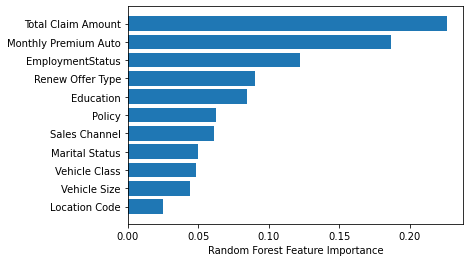

In [78]:
clf = RandomForestClassifier(n_estimators=100, random_state=0)
clf.fit(X_train, y_train)

feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

sorted_idx = clf.feature_importances_.argsort()
plt.barh(X_train.columns[sorted_idx], clf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

I found the features that influenced customer response the most. It shows that the total claim amount, monthly premium, and employment status are the three most weighted features determining a customer's offer response. 

## Evaluation

The machine learning model indicated that the renewal offer type wasn't the offer customers expected from the company. There might be other factors affecting the response rate besides renewing offer types. The plot shows that customers' total claim amount, monthly premiums, and employment status might influence the offer response. From the low number in accepting the renewed offer, the insurance company should rethink the details provided to the customer to increase customer retention. Further analysis and segmenting customers into the appropriate clusters can help the company design more appropriate renewal offer types.

The customers who are likely to accept offers are customers that are married. They are stable with their current lifestyle, so they tend to stay with the same insurance company. Divorced customers are also essential customers that can generate profit. The company should sometimes give discounts or come up with married couples offering renewals to have customers stay interested.

Having the customers talk to a sales agent can increase the chance of persuading them to take the offer. The company can explore recruiting more sales agents and opening more branches to increase customer acquisition. This will also allow more employees to provide ideas for new renewal offer types since they have direct contact with the customers and have a clearer understanding of customer needs.

Customers that are currently employed have high loyalty to the company. Retired customers can be the potential customers that will keep renewing insurance with the company. Older people like to stay in a routine, and younger people want to try different options. Offering other renewal policies like young driver insurance deals for young adults or offering elders policies that are priced reasonably can attract customers from all age groups.

The company can also offer promotions on monthly premiums to new customers for customer acquisition and upgrades to current customers for customer retention. Attracting low-income customers and customers outside of the suburban area can be feasible.